In [1]:
import os, shutil

original_dataset_dir = r'./train' 

base_dir = r'./cats_and_dogs_small'
if not os.path.isdir(base_dir): os.mkdir(base_dir)
    
#拆分訓練集、測試集、驗證集的目錄
train_dir = os.path.join(base_dir,'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)
    
validation_dir = os.path.join(base_dir,'validation')
if not os.path.isdir(validation_dir): os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)
    
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir):
    os.mkdir(train_cats_dir)
    
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir):
    os.mkdir(train_dogs_dir)
    
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir):
    os.mkdir(validation_cats_dir)
    
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
    

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir):
    os.mkdir(test_cats_dir)
    
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir):
    os.mkdir(test_dogs_dir)
    
    
#複製前面模型需要用到的圖片

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src ,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('訓練用的貓圖片', len(os.listdir(train_cats_dir)))
print('訓練用的狗圖片', len(os.listdir(train_cats_dir)))
print('驗證用的貓圖片', len(os.listdir(validation_cats_dir)))
print('驗證用的狗圖片', len(os.listdir(validation_cats_dir)))
print('測試用的貓圖片', len(os.listdir(test_cats_dir)))
print('測試用的狗圖片', len(os.listdir(test_cats_dir)))

訓練用的貓圖片 1000
訓練用的狗圖片 1000
驗證用的貓圖片 500
驗證用的狗圖片 500
測試用的貓圖片 500
測試用的狗圖片 500


In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        7

In [4]:
#如同往常會使用RMSprop 優化器, 使用單個sigmoid 單元結束, 所以使用二元交叉商做為損失基準

from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [14]:
#使用imageDataGenerator 產生器從目錄中讀取影像
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) #對資料做normalization
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150) #將影像調成150x150
                                                    , batch_size = 20
                                                    , class_mode = 'binary') #因為使用binary_crossentropy, 所以需要二元標籤

validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
#調整 model來搭配產生器產生資料
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100, # 產生器會無限產生資料, train資料總共2000筆, 一個batch_size是20筆,所以讓他跑100次
            epochs = 30, #全部資料跑過次數
            validation_data = validation_generator,
            validation_steps = 50  # 只有在 steps_per_epoch有設定時有用, test資料總共1000筆, 一個batch_size是20筆,所以讓他跑50次
             )

Epoch 1/30
100/100 [==============================] - 7s 74ms/step - loss: 0.7337 - acc: 0.5015 - val_loss: 0.6374 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6319 - acc: 0.6250 - val_loss: 0.6107 - val_acc: 0.6500
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5669 - acc: 0.6965 - val_loss: 0.6102 - val_acc: 0.6340
Epoch 4/30
100/100 [==============================] - 7s 73ms/step - loss: 0.5347 - acc: 0.7270 - val_loss: 0.5143 - val_acc: 0.7390
Epoch 5/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5097 - acc: 0.7420 - val_loss: 0.5000 - val_acc: 0.7430
Epoch 6/30
100/100 [==============================] - 7s 70ms/step - loss: 0.4808 - acc: 0.7640 - val_loss: 0.4824 - val_acc: 0.7650
Epoch 7/30
100/100 [==============================] - 7s 66ms/step - loss: 0.4598 - acc: 0.7905 - val_loss: 0.5368 - val_acc: 0.7260
Epoch 8/30
100/100 [==============================] - 7s 65ms/step - 

In [ ]:
model.save('cat_and_dogs_small_1.h5')

## 顯示訓練和驗證周期的損失值和準確度的曲線

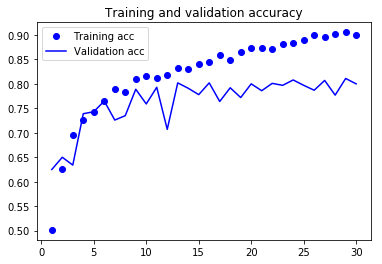

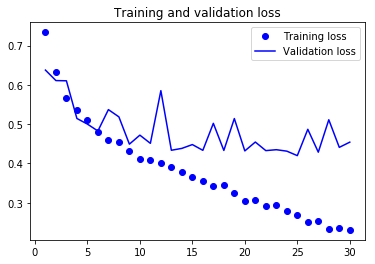

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() #overfitting~~

# 嘗試增強影像數據(data argumentation 與 Dropout功能)

In [19]:
datagen = ImageDataGenerator(
    rotation_range = 40, #旋轉的角度值
    width_shift_range = 0.2, #垂直或水平隨機平移影像
    height_shift_range = 0.2, 
    shear_range = 0.2, #用於隨機傾斜影像
    zoom_range = 0.2, #用於隨機縮放影像
    horizontal_flip = True, #用於隨機水平翻轉一半影像
    fill_mode = 'nearest') #新建影像填補

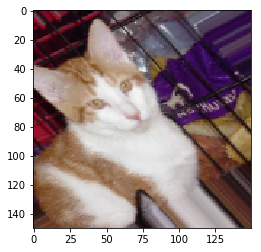

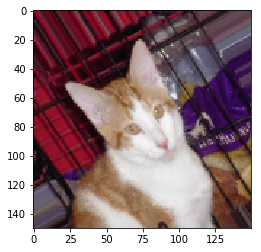

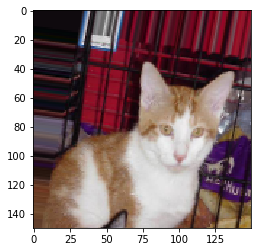

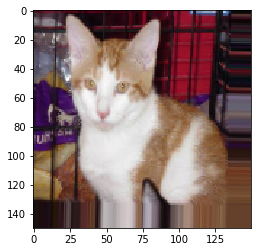

In [20]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size = (150,150))

x = image.img_to_array(img)#轉成numpy的矩陣
x = x.reshape((1,) + x.shape) #調整shape = (1,150,150,3)

i = 0

for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #丟失50% , Dropout的擺放位置
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) #不是分辨貓狗嗎? 為什麼是1

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [22]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40, #旋轉的角度值
    width_shift_range = 0.2, #垂直或水平隨機平移影像
    height_shift_range = 0.2, 
    shear_range = 0.2, #用於隨機傾斜影像
    zoom_range = 0.2, #用於隨機縮放影像
    horizontal_flip = True, #用於隨機水平翻轉一半影像
    fill_mode = 'nearest') #新建影像填補

test_datagen = ImageDataGenerator(rescale = 1./255) #不需擴充

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size =(150,150),
                    batch_size = 32,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150, 150),
                    batch_size = 32,
                    class_mode = 'binary')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs =100,
            validation_data= validation_generator,
            validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 233ms/step - loss: 0.6921 - acc: 0.5267 - val_loss: 0.6874 - val_acc: 0.5190
Epoch 2/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6793 - acc: 0.5669 - val_loss: 0.6831 - val_acc: 0.5387
Epoch 3/100
100/100 [==============================] - 21s 212ms/step - loss: 0.6750 - acc: 0.5707 - val_loss: 0.6427 - val_acc: 0.6148
Epoch 4/100
100/100 [==============================] - 21s 213ms/step - loss: 0.6606 - acc: 0.6030 - val_loss: 0.6309 - val_acc: 0.6313
Epoch 5/100
100/100 [==============================] - 21s 205ms/step - loss: 0.6450 - acc: 0.6187 - val_loss: 0.6102 - val_acc: 0.6561
Epoch 6/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6268 - acc: 0.6401 - val_loss: 0.6770 - val_acc: 0.5711
Epoch 7/100
100/100 [==============================] - 22s 217ms/step - loss: 0.6251 - acc: 0.6439 -

100/100 [==============================] - 22s 216ms/step - loss: 0.4098 - acc: 0.8122 - val_loss: 0.4317 - val_acc: 0.8014
Epoch 61/100
100/100 [==============================] - 22s 221ms/step - loss: 0.4166 - acc: 0.8147 - val_loss: 0.4530 - val_acc: 0.7957
Epoch 62/100
100/100 [==============================] - 23s 227ms/step - loss: 0.4167 - acc: 0.8131 - val_loss: 0.4155 - val_acc: 0.8077
Epoch 63/100
100/100 [==============================] - 22s 222ms/step - loss: 0.4070 - acc: 0.8112 - val_loss: 0.4651 - val_acc: 0.7754
Epoch 64/100
100/100 [==============================] - 21s 215ms/step - loss: 0.3992 - acc: 0.8134 - val_loss: 0.5172 - val_acc: 0.7811
Epoch 65/100
100/100 [==============================] - 21s 212ms/step - loss: 0.4067 - acc: 0.8144 - val_loss: 0.4248 - val_acc: 0.8077
Epoch 66/100
100/100 [==============================] - 21s 212ms/step - loss: 0.3934 - acc: 0.8229 - val_loss: 0.4318 - val_acc: 0.8166
Epoch 67/100
100/100 [==============================] 

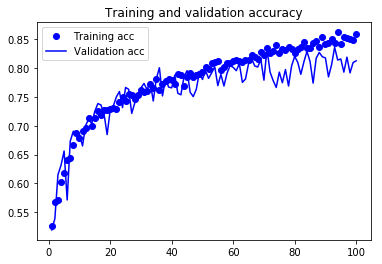

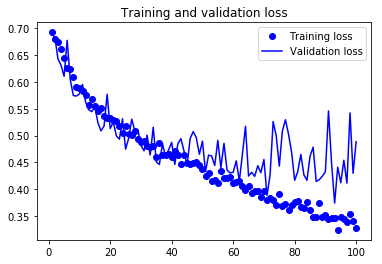

In [23]:
#透過進一步的regularization 的技術 加上調整神經網路參數, ex:卷基層的過濾器數量或是神經網路中的層數。

#但由於本模型只提取較少的資料, 在這樣的情快下就必須使用預先訓練的model

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() #overfitting~~

In [24]:
model.save('cats_and_dogs_small_2.h5')